# Handling Missing Values and Apply Logestic Regression

Logistic Regression with Python

For this lecture we will be working with the Titanic Data Set from n Kaggle. This is a very famous data set and very often is a student's first step in machine learning!

We'll be trying to predict a classification- survival or deceased. Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


load the data

In [5]:
train=pd.read_csv('Titanic-Dataset.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


EDA-Check out the missing data

<Axes: >

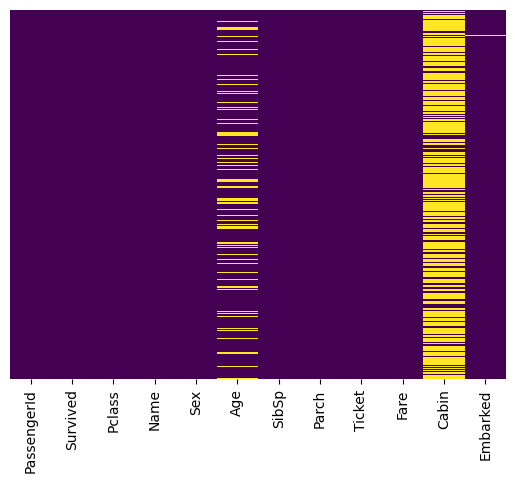

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') #isnull()- if the value is null then it is true if not null then it is false 

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

"hue='Survived':\n\nTells Seaborn to color bars based on the Survived column values (0, 1).\n\n✅ palette='RdBu_r':\n\nNow applies correctly to these hue categories.\n\n✅ legend=False:\n\nRemoves the redundant legend if not needed."

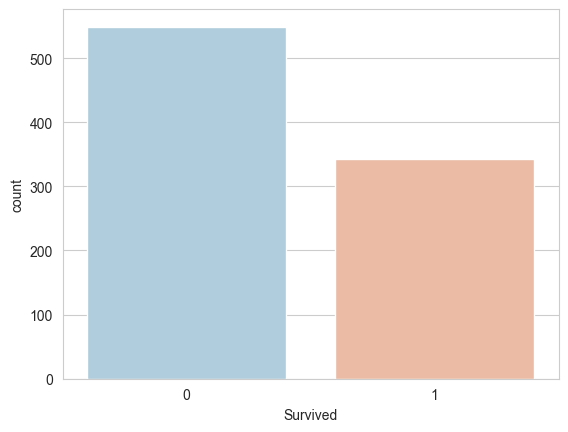

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, hue='Survived', palette='RdBu_r', legend=False) 
'''hue='Survived':

Tells Seaborn to color bars based on the Survived column values (0, 1).

✅ palette='RdBu_r':

Now applies correctly to these hue categories.

✅ legend=False:

Removes the redundant legend if not needed.'''


O means not survived and 1 means survived

<Axes: xlabel='Survived', ylabel='count'>

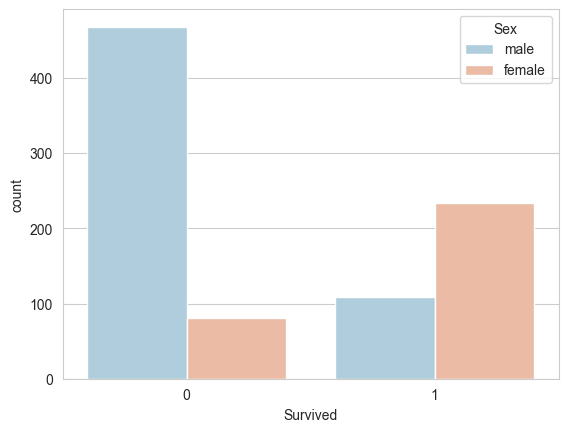

In [9]:
#wit the respect to survived let's check who has more survived wither male is female
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,hue='Sex',palette='RdBu_r')

so as per image  we shown that in death category the male are more and female are less ,nut in the survieved category it is vice versa 

<Axes: xlabel='Survived', ylabel='count'>

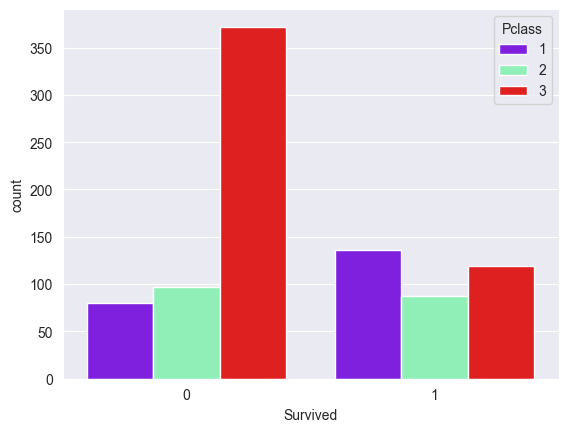

In [10]:
#now with the respect of Pclass
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

As per image we show that in the O class who are death p3class is more then other classes in the death category.In the 1 category p1 class is more survived then other classes

'✅ sns.displot is a Seaborn function for visualizing distributions of data using histograms, KDE plots, or both.\n\nIt is used for univariate (single variable) analysis to understand how your data is distributed.\n\n✅ train[\'Age\'].dropna()\nSelects the Age column from your DataFrame train.\n\n.dropna() removes all NaN (missing) values so they do not affect the plot.\n✅ kde=False\nBy default, sns.displot can overlay a KDE (Kernel Density Estimate) curve to show the smooth distribution shape.\n\nkde=False disables this, so only the histogram will be shown.\n\n🚩 What does bins mean in a histogram?\nA histogram groups continuous data into intervals called "bins".\n\nEach bin is a range of values, and the height of the bar shows how many data points fall in that range.\n\n\n'

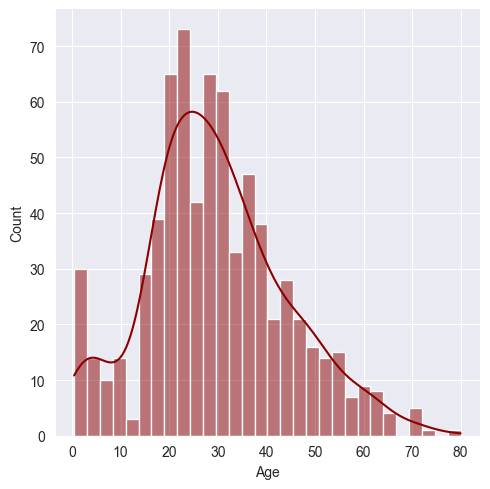

In [11]:
#now plot my age inthe for m of kernal density estimation- check how my age has been distributed 
sns.displot(train['Age'].dropna(),kde=True,color='darkred',bins=30)
'''✅ sns.displot is a Seaborn function for visualizing distributions of data using histograms, KDE plots, or both.

It is used for univariate (single variable) analysis to understand how your data is distributed.

✅ train['Age'].dropna()
Selects the Age column from your DataFrame train.

.dropna() removes all NaN (missing) values so they do not affect the plot.
✅ kde=False
By default, sns.displot can overlay a KDE (Kernel Density Estimate) curve to show the smooth distribution shape.

kde=False disables this, so only the histogram will be shown.

🚩 What does bins mean in a histogram?
A histogram groups continuous data into intervals called "bins".

Each bin is a range of values, and the height of the bar shows how many data points fall in that range.


'''

| Feature          | `sns.displot`                                                | `DataFrame.hist()`                                |
| ---------------- | ------------------------------------------------------------ | ------------------------------------------------- |
| **Library**      | Seaborn                                                      | Pandas/Matplotlib                                 |
| **NaN Handling** | You explicitly drop `NaN` with `.dropna()`                   | Ignores `NaN` automatically                       |
| **KDE Option**   | Supports KDE overlay (`kde=True/False`)                      | No KDE support                                    |
| **Styling**      | Uses Seaborn's styling and color maps                        | Uses Matplotlib styling (affected by `plt.style`) |
| **Figure Type**  | Creates its own Figure (FacetGrid)                           | Plots on the current Axes                         |
| **Transparency** | Controlled using `alpha` inside `displot` (`alpha` optional) | Controlled using `alpha`, used here as `0.7`      |
| **Plot Control** | Advanced styling, facets, hue support                        | Simple direct plot                                |
| **Ease of Use**  | Higher-level visualization with styling                      | Simpler, faster for quick plots                   |


'\nThis plots a dark red histogram with 30 bins of the Age distribution, with slight transparency, using Pandas/Matplotlib.\nalpha=0.7:\n\nSets transparency level:1,0.7.....'

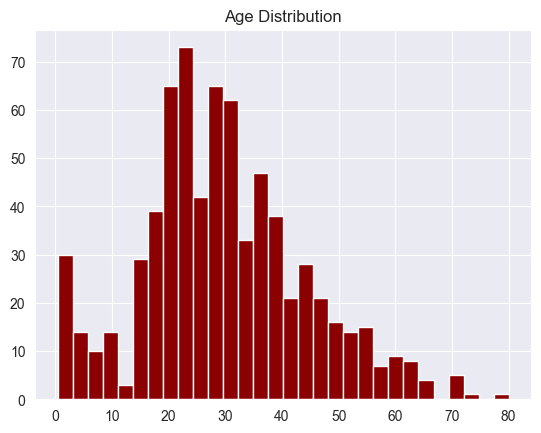

In [12]:
train['Age'].hist(bins=30,color='darkred',alpha=1)
plt.title('Age Distribution')
'''
This plots a dark red histogram with 30 bins of the Age distribution, with slight transparency, using Pandas/Matplotlib.
alpha=0.7:

Sets transparency level:1,0.7.....'''

<Axes: xlabel='SibSp', ylabel='count'>

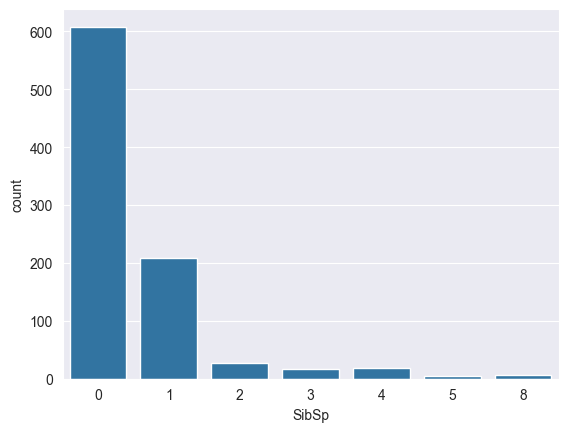

In [13]:
sns.countplot(x='SibSp',data=train)

<Axes: >

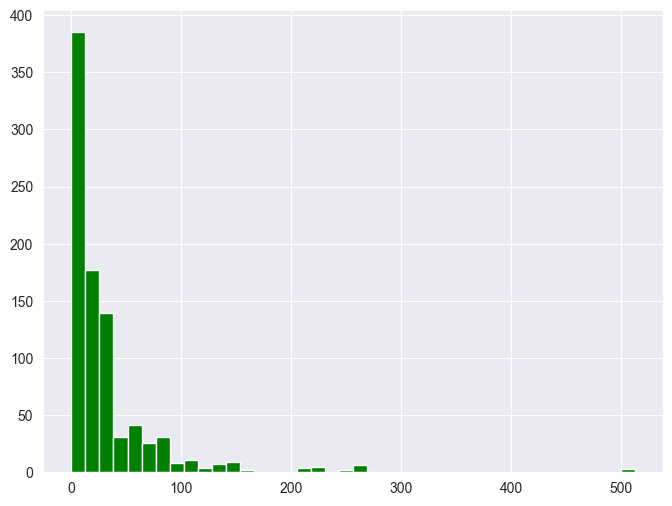

In [14]:
train['Fare'].hist(color='green',bins=40,figsize=(8,6))

# Cufflinks for plots

Let's take a quick moment to show an example of cufflinks !


In [15]:
import cufflinks as cf
cf.go_offline()


In [16]:
# plotly function
train['Fare'].iplot(kind='hist',bins=30,color='green')

ValueError: 
    Invalid value of type 'builtins.str' received for the 'color' property of histogram.marker
        Received value: 'rgba(0, 128, 0, np.float64(1.0))'

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color: see https://plotly.com/python/css-colors/ for a list
      - A number that will be interpreted as a color
        according to histogram.marker.colorscale
      - A list or array of any of the above

# Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:


<Axes: xlabel='Pclass', ylabel='Age'>

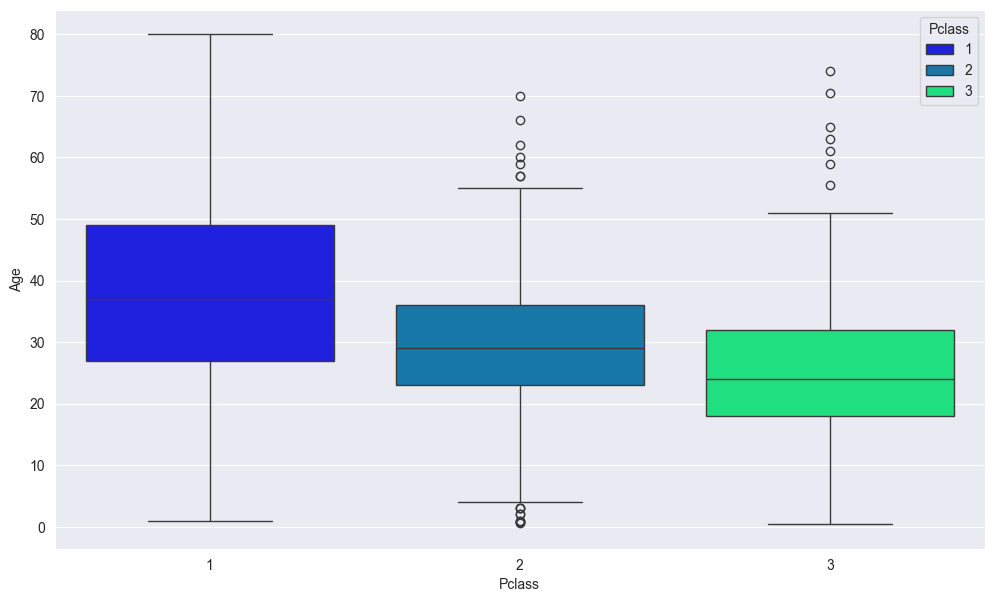

In [17]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',hue='Pclass',data=train,palette='winter')

try to replace Pclass with the age .With the respect of the passenger class we see that the  first passsenger class mean is 37 2nd class mean is 28 3rd class mean is 24.
Applyling some condition :
If the person belongs to pclass1 ,then replace that age with the mean of that particular class .If the person belongs to pclass2 ,then replace that age with the mean of that particular class .If the person belongs to pclass3 ,then replace that age with the mean of that particular class .

We can see the weather passengers in the higher classes tend to be older ,which make sense.We'll use these average age values to impute based on Pclass for Age .

In [18]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]

    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 28
        else:
            return 24
    else:
        return Age

Now apply that function!

In [19]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\Biswajit\AppData\Local\Temp\ipykernel_16524\67791097.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Biswajit\AppData\Local\Temp\ipykernel_16524\67791097.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [20]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

Now check the heatmap again

<Axes: >

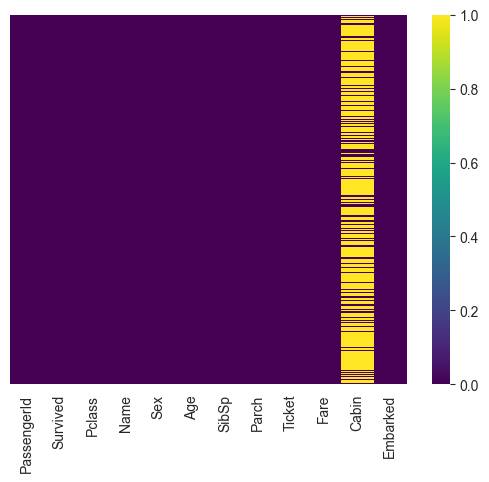

In [25]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap='viridis' )

As you see the age column null value is vanish but in te cabin is much more null value so we have to drop it 

In [26]:
train.drop('Cabin', axis=1, inplace=True)


In [27]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


<Axes: >

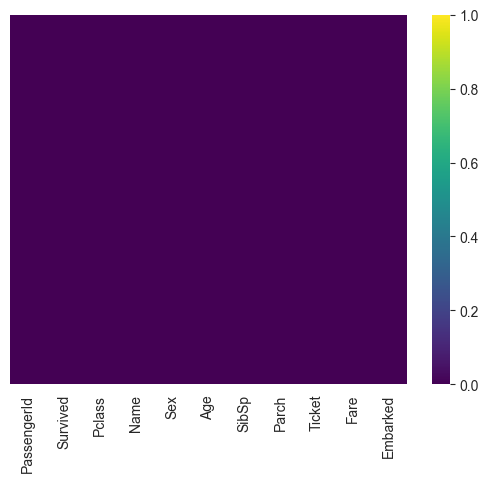

In [28]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap='viridis' )